<a href="https://colab.research.google.com/github/sipocz/DataMiner/blob/main/DataMiner_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import os
from bs4 import  BeautifulSoup

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/"

In [6]:
fname="Eseményfeladatok _ RG - IT Service Management.html"


In [7]:
htmltext=open(path+fname)

In [8]:
ht=htmltext.read()

In [9]:
print("------------------------------------------------")

soup=BeautifulSoup(ht,"html.parser")
table_rows1=soup.find_all("tr", class_="list_row list_odd is-selected")
table_rows2=soup.find_all("tr", class_="list_row list_even is-selected")
table_rows=table_rows1+table_rows2

------------------------------------------------


In [10]:
len(table_rows)

224

In [11]:
a_row=table_rows[2].find_all("td",class_="vt")

In [12]:
a_row[10]["title"]

'A feladatot ki lehet választani nyomtatásra, a nyomtató megfelelő állapotban van, mégis hibaüzenet jelenik meg. Reggel még más kollégák tudtak nyomatni. A napi munka addig nem kezdhető meg, amíg a feladat ki nincs nyomtatva.'

In [13]:
def print_a_row(a_row,to_print=False):
    task_id=a_row[0].a["aria-label"].split(": ")[1]
    task_link=a_row[0].a["href"]
    task_description=a_row[1].text
    inc_name=a_row[6].a["aria-label"].split(": ")[1]
    inc_link=a_row[6].a["href"]
    t_creation=a_row[8].div["timeago"]
    t_start=a_row[7].div["timeago"]
    t_end=a_row[9].div["timeago"]
    try:
        full_text=a_row[10]["title"]
    except:
        full_text="None"

    if to_print:
        print("taskid:",task_id,"\ntask_link: ",task_link)
        print(a_row[1].text)

        print("incident name:",inc_name)
        print("incident link:",inc_link )
    
        print("Creation time:",t_creation)
        print("Start time:",t_start)
        print("End time",t_end)
    


         
        print("Text descriptiopn:",full_text)
        
        print("__________________________")
    return([task_id,task_link,task_description,inc_name,inc_link,t_creation,t_start,t_end,full_text])

In [14]:
data_list=[]
for a_row_e in table_rows:
    a_row=a_row_e.find_all("td",class_="vt")
    data_list.append(print_a_row(a_row,to_print=False))


In [15]:
print (len(data_list))

224


In [16]:
fname="Incidents _ RG - IT Service Management.html"

In [17]:
htmltext=open(path+fname)

In [18]:
ht=htmltext.read()
soup=BeautifulSoup(ht,"html.parser")


In [19]:
table_rows1=soup.find_all("tr",  class_="list_row list_odd ")
table_rows2=soup.find_all("tr",  class_="list_row list_even ")
table_rows=table_rows1+table_rows2

In [20]:
len(table_rows)

61

In [21]:
a_row=table_rows[2].find_all("td",class_="vt")

In [22]:
def print_incident_row(a_row,to_print=False):
    task_id=a_row[0].a["aria-label"].split(": ")[1]
    task_link="https://richterprod.service-now.com/"+a_row[0].a["href"]
    task_description=a_row[4].text
    inc_name=task_id
    inc_link=task_link
    t_creation=a_row[11].div["timeago"]
    t_start=a_row[10].div["timeago"]
    t_end=a_row[12].div["timeago"]
    try:
        full_text1=a_row[4].text
    except:
        full_text1="None"

    
    try:
        full_text2=a_row[14]["title"]
    except:
        full_text2="None"
    full_text=full_text1+"\n"+full_text2
    if to_print:
        print("taskid:",task_id,"\ntask_link: ",task_link)
        print("task description:",task_description)

        print("incident name:",inc_name)
        print("incident link:",inc_link )
    
        print("Creation time:",t_creation)
        print("Start time:",t_start)
        print("End time",t_end)
    


         
        print("Text description:",full_text)
        
        print("__________________________")
    return([task_id,task_link,task_description,inc_name,inc_link,t_creation,t_start,t_end,full_text])
    

In [23]:
data_list2=[]
for a_row_e in table_rows:
    a_row=a_row_e.find_all("td",class_="vt")
    data_list2.append(print_incident_row(a_row,to_print=False))

In [24]:
len(data_list2)


61

In [25]:
all_data_list=data_list+data_list2


In [26]:
len(all_data_list)

285

In [27]:
import pandas as pd


In [28]:
df=pd.DataFrame(all_data_list,columns=["Task","TaskLink","Desc","Inc","IncLink","Creation","Start","End","LongDesc"])

In [29]:
df[['Start', 'End', 'Creation']] = df[['Start', 'End', 'Creation']].apply(pd.to_datetime)

In [30]:
df["End_Delta"]=df["End"]-df["Start"]
df["End_Delta_sec"]=pd.to_numeric(df["End_Delta"]/1000000000)

In [31]:
df["Start_Delta"]=df["Start"]-df["Creation"]
df["Start_Delta_sec"]=pd.to_numeric(df["Start_Delta"]/1000000000)

In [32]:
df.sort_values(["Creation"],inplace=True,ignore_index=True)

In [33]:
df.reindex()

,Task,TaskLink,Desc,Inc,IncLink,Creation,Start,End,LongDesc,End_Delta,End_Delta_sec,Start_Delta,Start_Delta_sec
0,TASK0216008,https://richterprod.service-now.com/incident_t...,"Az OV-01 TFL operátori állomás meghibásodott, ...",INC0118840,https://richterprod.service-now.com/incident.d...,2021-09-08 05:45:29,2021-09-08 05:48:13,2021-11-05 06:09:23,"Az operátori állomás meghibásodott, nem indíth...",58 days 00:21:10,5012470,0 days 00:02:44,164
1,TASK0225687,https://richterprod.service-now.com/incident_t...,T5 tartály vezérelt fűtése nem működik ezért b...,INC0126270,https://richterprod.service-now.com/incident.d...,2021-10-15 05:19:48,2021-10-15 05:19:53,2021-10-19 13:09:13,T5 tartály fűtése csak kézi üzemmódban működik...,4 days 07:49:20,373760,0 days 00:00:05,5
2,TASK0225759,https://richterprod.service-now.com/incident_t...,Nem tudom kinyomtatni a mérési eredményeket.,INC0126341,https://richterprod.service-now.com/incident.d...,2021-10-15 07:58:58,2021-10-15 07:59:21,2021-10-19 13:07:54,Nem tudom kinyomtatni a mérési eredményeket a ...,4 days 05:08:33,364113,0 days 00:00:23,23
3,TASK0227851,https://richterprod.service-now.com/incident_t...,nem tudunk nyomtatni,INC0127776,https://richterprod.service-now.com/incident.d...,2021-10-25 04:53:38,2021-10-25 04:53:42,2021-11-15 10:00:12,None,21 days 05:06:30,1832790,0 days 00:00:04,4
4,TASK0230843,https://richterprod.service-now.com/incident_t...,AZ RG-LAB rendszerből nem tudunk feladatot nyo...,INC0129902,https://richterprod.service-now.com/incident.d...,2021-11-04 09:53:28,2021-11-04 09:53:51,2021-11-04 12:30:30,"A feladatot ki lehet választani nyomtatásra, a...",0 days 02:36:39,9399,0 days 00:00:23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,INC0212666,https://richterprod.service-now.com/incident.d...,[DCS rendszerek dorog - hibajegy],INC0212666,https://richterprod.service-now.com/incident.d...,2023-02-09 10:30:05,2023-02-09 10:46:09,2023-02-09 12:10:09,[DCS rendszerek dorog - hibajegy]\nÉrintett re...,0 days 01:24:00,5040,0 days 00:16:04,964
281,INC0212840,https://richterprod.service-now.com/incident.d...,MIFO-D -ben az 1. izolátor és 2. izolátorhoz t...,INC0212840,https://richterprod.service-now.com/incident.d...,2023-02-10 07:24:39,2023-02-10 07:24:39,NaT,MIFO-D -ben az 1. izolátor és 2. izolátorhoz t...,NaT,-9223372036854775808,0 days 00:00:00,0
282,INC0213025,https://richterprod.service-now.com/incident.d...,[DCS rendszerek dorog - hibajegy],INC0213025,https://richterprod.service-now.com/incident.d...,2023-02-10 14:35:32,2023-02-10 14:35:39,2023-02-13 10:57:31,[DCS rendszerek dorog - hibajegy]\nNone,2 days 20:21:52,246112,0 days 00:00:07,7
283,INC0213469,https://richterprod.service-now.com/incident.d...,Terepi terminál nem jelenít meg semmilyen értéket,INC0213469,https://richterprod.service-now.com/incident.d...,2023-02-14 08:36:08,2023-02-14 08:36:08,NaT,Terepi terminál nem jelenít meg semmilyen érté...,NaT,-9223372036854775808,0 days 00:00:00,0


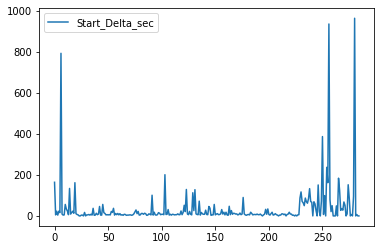

In [34]:
df.plot(y="Start_Delta_sec")

In [35]:
for i in range(len(df)):
    print(i,df.loc[i].TaskLink)

0 https://richterprod.service-now.com/incident_task.do?sys_id=fa348d90dbaa7090b4c40573f39619c5&sysparm_record_target=incident_task&sysparm_record_row=1&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_created_on
1 https://richterprod.service-now.com/incident_task.do?sys_id=6b212fccdb5f7854b4c40573f3961904&sysparm_record_target=incident_task&sysparm_record_row=2&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_created_on
2 https://richterprod.service-now.com/incident_task.do?sys_id=f6954458db5b74549fdbbb13f3961903&sysparm_record_target=incident_task&sysparm_record_row=3&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_created_on
3 https://richterprod.service-now.com/incident_task.do?sys_id=791bbe9bdbd3bc109fdbbb13f396198a&sysparm_record_target=incident_task&sysparm_record_row=4&sysparm_record_rows=224&sysparm_record_list=assignment_group.name%3DMAS_DOR%5EORDERBYsys_cre

In [36]:
fname="INC0188514 _ Incidens _ RG - IT Service Management.html"
path="/content/drive/MyDrive/001_METU/2. félév/dolgozat/adatok/inc/"


In [37]:
htmltext=open(path+fname)
ht=htmltext.read()
soup=BeautifulSoup(ht,"html.parser")

In [38]:
print("------------------------------------------------")

soup=BeautifulSoup(ht,"html.parser")
table_rows=soup.find_all("li", class_="h-card h-card_md h-card_comments")


------------------------------------------------


In [82]:
table_rows[1]

<li class="h-card h-card_md h-card_comments"><div class="sn-card-component sn-card-component_first sn-card-component_meta sn-card-component_meta_sibling"><span class="sn-card-component-createdby">Rendszer</span></div><div class="sn-card-component sn-card-component_first sn-card-component_meta"><span class="sn-card-component-time"><span>E-mail elküldött</span><span class="sn-card-component_accent-bar_bullet">•</span><div class="date-calendar">2022-09-29 13:56:57</div><div class="datex date-timeago" data-original-title="5 hónappal ezelőtt" null="5 hónappal ezelőtt" timeago="2022-09-29 11:56:57" title="5 hónappal ezelőtt">5 hónappal ezelőtt</div></span></div><div class="sn-card-component sn-card-component_records"><div class="sn-widget"><ul class="sn-widget-list sn-widget-list-table"><li><span class="sn-widget-list-table-cell"><span class="icon-mail"></span></span><span class="sn-widget-list-table-cell">E-mail elküldött</span></li><li><span class="sn-widget-list-table-cell">Tárgy:</span><

In [90]:
def find_elements(el):
    temp=el.findChildren()
    return len(temp)

In [98]:
def incident_record_elements(incident_record, to_print=False):
    out=[]
    for child in incident_record.descendants:
        try:
            if find_elements(child)==0:
                if to_print:
                    print(child.text)
                out.append(child.text)
        except:
            pass
    return(out)
            

In [107]:
incident_record_list=incident_record_elements(table_rows[1])

In [ ]:
incident_record_list

In [104]:
'Megoldott (véglegesen)  ' in incident_record_list

False

In [78]:
find_elements(table_rows[0])

31